<a href="https://www.kaggle.com/code/asafcemakn/pima-indians-diabetes?scriptVersionId=160011206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [2]:
# 1.1
# Number of unique values
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [3]:
# Data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Mean, sum, quartiles, max, min, std
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [5]:
# Number of observations and variables
df.shape

(768, 9)

In [6]:
# 1.2
# Identifying numerical and categorical variables

def grab_col_names(dataframe, cat_th=10, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
        
# 1.3
# Categorical and numerical variable analysis
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
# 1.4
# Mean of target variable according to categorical variables
df.groupby(cat_cols).agg({"Outcome": "mean"})

,Outcome
Outcome,
0,0.000
1,1.000


In [8]:
# Mean of numerical variables according to target variable
for col in num_cols:
    print(df.groupby("Outcome").agg({col: "mean"}))

         Pregnancies
Outcome             
0              3.298
1              4.866
         Glucose
Outcome         
0        109.980
1        141.257
         BloodPressure
Outcome               
0               68.184
1               70.825
         SkinThickness
Outcome               
0               19.664
1               22.164
         Insulin
Outcome         
0         68.792
1        100.336
           BMI
Outcome       
0       30.304
1       35.143
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
           Age
Outcome       
0       31.190
1       37.067


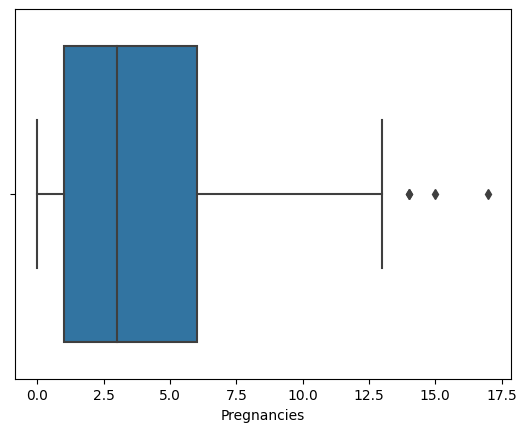

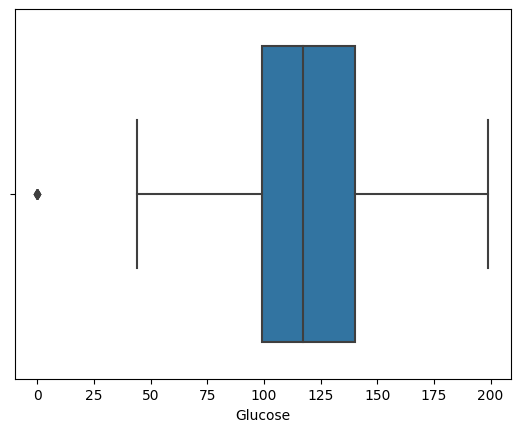

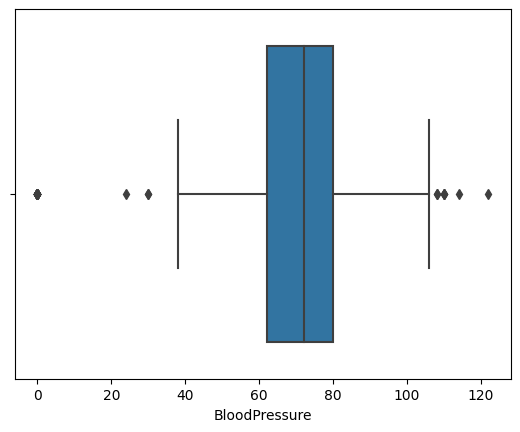

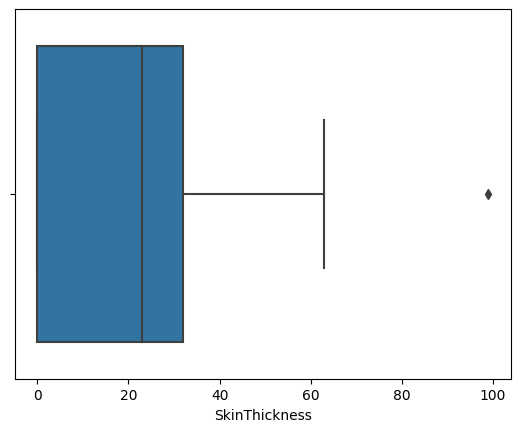

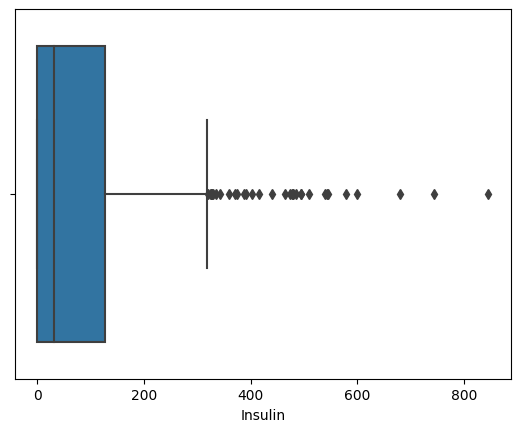

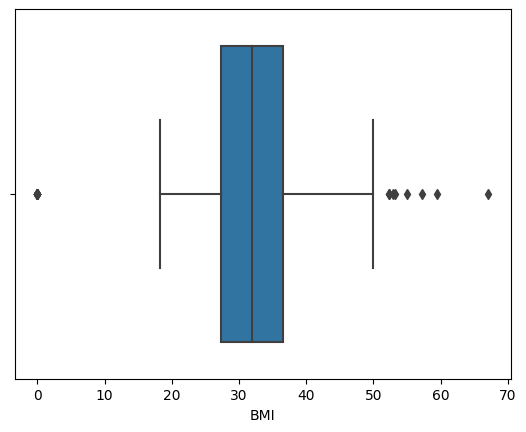

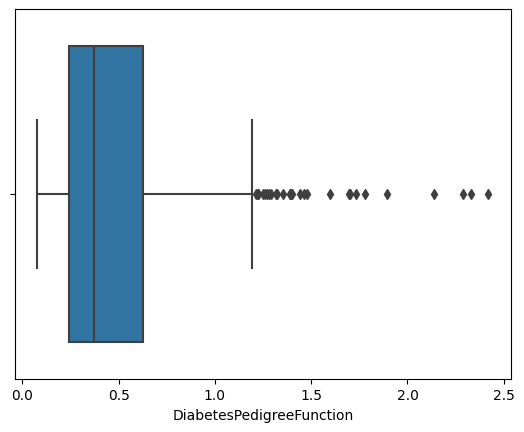

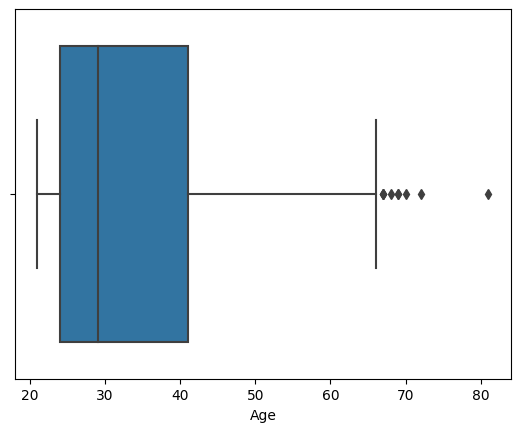

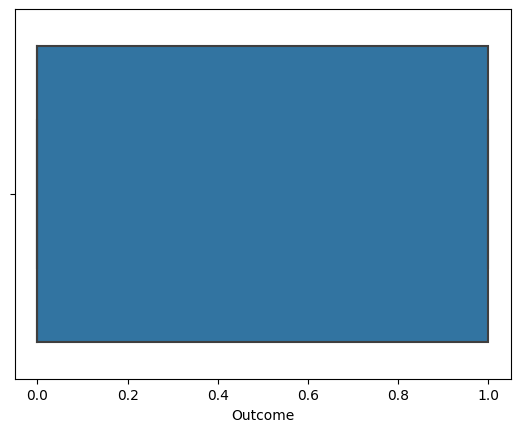

In [9]:
# 1.5
# Outliers with graphical technique
for col in df:
    plt.figure()
    sns.boxplot(x=df[col])

In [10]:
# 1.6
# Missing value query
df.isnull().any()


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
# 1.7
# Correlation analysis
df.corr()
dimension_variable = [ "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI" ]
corr_matrix = df[dimension_variable].corr()
corr_matrix

df.describe([0.5, 0.8, 0.85, 0.9, 0.95, 0.99]).T

,count,mean,std,min,50%,80%,85%,90%,95%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,3.000,7.000,8.000,9.000,10.000,13.000,17.000
Glucose,768.000,120.895,31.973,0.000,117.000,147.000,156.000,167.000,181.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,72.000,82.000,84.000,88.000,90.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,23.000,35.000,37.000,40.000,44.000,51.330,99.000
Insulin,768.000,79.799,115.244,0.000,30.500,150.000,179.900,210.000,293.000,519.900,846.000
BMI,768.000,31.993,7.884,0.000,32.000,37.800,39.295,41.500,44.395,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.372,0.687,0.757,0.879,1.133,1.698,2.420
Age,768.000,33.241,11.760,21.000,29.000,42.600,46.000,51.000,58.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000


In [12]:
# 2.1
# Identify missing values

import numpy as np
df[dimension_variable] = df[dimension_variable].replace( 0 , np.NaN )
df[dimension_variable].head()
df.isnull().sum()

df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())

df.isnull().sum()
dff = pd.get_dummies(df[[ "Insulin" ]] , drop_first = True )

# # Standardization of variables
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff) , columns =dff.columns)
dff.head()


# # Implement the KNN method
from sklearn.impute import KNNImputer
imputer = KNNImputer( n_neighbors = 5 )
dff = pd.DataFrame(imputer.fit_transform(dff) , columns =dff.columns)
dff.head()

dff = pd.DataFrame(scaler.inverse_transform(dff) , columns =dff.columns)
df["Insulin"] = dff["Insulin"]

In [13]:
# 2.2
# Creating a new variable

"""
Glucose Level:

Normal: 70-99 mg/dL
Pre-diabetes: 100-125 mg/dL
Diabetes: 126 mg/dL and above
Source: American Diabetes Association (ADA) Standards of Medical Care in Diabetes

Blood Pressure Level:

Normal: Systolic < 120 mmHg and Diastolic < 80 mmHg
Elevated: Systolic 120-129 mmHg and Diastolic < 80 mmHg
Hypertension Stage 1: Systolic 130-139 mmHg or Diastolic 80-89 mmHg
Hypertension Stage 2: Systolic ≥ 140 mmHg or Diastolic ≥ 90 mmHg
Source: American College of Cardiology/American Heart Association Guideline for the Prevention, Detection,
 Evaluation, and Management of High Blood Pressure in Adults
 
BMI (Body Mass Index):

Underweight: BMI < 18.5
Normal weight: 18.5 <= BMI < 25
Overweight: 25 <= BMI < 30
Obesity: BMI >= 30
Source: World Health Organization (WHO) BMI Classification

Age (based on estrogen levels):

Highest (perimenopause): 20-30
Moderate (perimenopause): 30-40
Low (postmenopause): 40-50
Lowest (postmenopause): 50-60

Menopause and the Skin: Old Favorites and New Innovations in Cosmeceuticals for Estrogen-Deficient Skin 
- Scientific Figure on ResearchGate
"""

# Glucose level
df.loc[df["Glucose"] < 100, "Glucose_Level"] = "Normal"
df.loc[(df["Glucose"] >= 100) & (df["Glucose"] < 126), "Glucose_Level"] = "Pre-diabetes"
df.loc[df["Glucose"] >= 126, "Glucose_Level"] = "Diabetes"
df.groupby( "Glucose_Level" ).agg({ "Outcome" : [ "mean" , "count" ]})

# Blood pressure
df.loc[df["BloodPressure"] < 80, "BloodPressure_Level"] = "Normal"
df.loc[(df["BloodPressure"] >= 80) & (df["BloodPressure"] < 90), "BloodPressure_Level"] = "Hypertension Stage 1"
df.loc[df["BloodPressure"] >= 90, "BloodPressure_Level"] = "Hypertension Stage 2"
df.groupby( "BloodPressure_Level" ).agg({ "Outcome" : [ "mean" , "count" ]})

# BMI

df.loc[(df["BMI"] >= 18.2) & (df["BMI"] < 25), "BMI_Level"] = "Normal weight"
df.loc[(df["BMI"] >= 25) & (df["BMI"] < 30), "BMI_Level"] = "Overweight"
df.loc[df["BMI"] >= 30, "BMI_Level"] = "Obesity"
df.groupby( "BMI_Level" ).agg({ "Outcome" : [ "mean" , "count" ]})
df["BMI"].describe()
# Age based on estrogen level
df.loc[(df["Age"] >= 20) & (df["Age"] < 30), "Estrogen_Level_wrt_Age"] = "Highest"
df.loc[(df["Age"] >= 30) & (df["Age"] < 40), "Estrogen_Level_wrt_Age"] = "Moderate"
df.loc[(df["Age"] >= 40), "Estrogen_Level_wrt_Age"] = "Low"
df.groupby( "Estrogen_Level_wrt_Age" ).agg({ "Outcome" : [ "mean" , "count" ]})

df.head()
cat_cols, num_cols, cat_but_car = grab_col_names(df)
df1 = df.copy()

Observations: 768
Variables: 13
cat_cols: 5
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [14]:
# 2.3
# One-Hot Encoding

cat_cols.remove("Outcome")
cat_cols

for col in cat_cols:
    df1 = pd.get_dummies(df1, columns=[col], dtype="float", drop_first=True)
df1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Level_Normal,Glucose_Level_Pre-diabetes,BloodPressure_Level_Hypertension Stage 2,BloodPressure_Level_Normal,BMI_Level_Obesity,BMI_Level_Overweight,Estrogen_Level_wrt_Age_Low,Estrogen_Level_wrt_Age_Moderate
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000


In [15]:
# 2.4
# Standardization

rs = RobustScaler()

df1[num_cols] = rs.fit_transform(df1[num_cols])
df1.describe().T



,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,0.169,0.674,-0.600,-0.400,0.000,0.600,2.800
Glucose,768.000,0.116,0.752,-1.802,-0.426,0.000,0.574,2.025
BloodPressure,768.000,0.013,0.756,-3.013,-0.513,0.000,0.487,3.112
SkinThickness,768.000,-0.000,1.256,-3.165,-0.593,0.000,0.407,9.978
Insulin,768.000,-0.000,2.497,-4.157,-1.000,0.000,0.000,20.279
BMI,768.000,0.006,0.756,-1.560,-0.538,0.000,0.462,3.813
DiabetesPedigreeFunction,768.000,0.260,0.866,-0.770,-0.337,0.000,0.663,5.353
Age,768.000,0.249,0.692,-0.471,-0.294,0.000,0.706,3.059
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000
Glucose_Level_Normal,768.000,0.250,0.433,0.000,0.000,0.000,0.250,1.000


In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Level,BloodPressure_Level,BMI_Level,Estrogen_Level_wrt_Age
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50,1,Diabetes,Normal,Obesity,Low
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31,0,Normal,Normal,Overweight,Moderate
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32,1,Diabetes,Normal,Normal weight,Moderate
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,Normal,Normal,Overweight,Highest
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,Diabetes,Normal,Obesity,Moderate


In [17]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Level_Normal,Glucose_Level_Pre-diabetes,BloodPressure_Level_Hypertension Stage 2,BloodPressure_Level_Normal,BMI_Level_Obesity,BMI_Level_Overweight,Estrogen_Level_wrt_Age_Low,Estrogen_Level_wrt_Age_Moderate
0,0.600,0.765,-0.013,0.835,0.000,0.132,0.665,1.235,1,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000
1,-0.400,-0.790,-0.388,-0.022,0.000,-0.637,-0.056,0.118,0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000
2,1.000,1.630,-0.513,0.000,0.000,-1.000,0.783,0.176,1,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
3,-0.400,-0.691,-0.388,-0.879,-1.808,-0.473,-0.537,-0.471,0,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
4,-0.600,0.494,-2.013,0.835,0.366,1.176,5.008,0.235,1,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000


In [18]:
# 2.5
# Creating a model

y = df1["Outcome"]
X = df1.drop(["Outcome"], axis=1)
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7965367965367965